# Week 3

## Exercise 1 -  Quadratic functions

### Exercise 1a) Defining the `Quadratic` class

Example solution with test block is shown below. Note that while we store the coefficients in a tuple, they can just as well be stored as three seperate float variables.

<IPython.core.display.Javascript object>


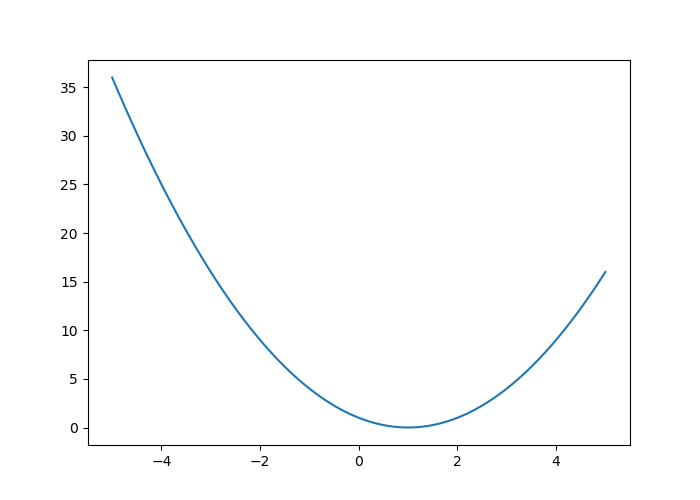

In [1]:
%matplotlib notebook
class Quadratic:
    def __init__(self, a2, a1, a0):
        self.coeffs = (a2, a1, a0)
        
    def __call__(self, x):
        a2, a1, a0 = self.coeffs
        return a2*x**2 + a1*x + a0

# Test block
import numpy as np
import matplotlib.pyplot as plt
    
f = Quadratic(1, -2, 1)
x = np.linspace(-5, 5, 101)
plt.figure(0, figsize=(7,5))
plt.plot(x, f(x))
plt.show()

### Exercise 1b) Pretty printing

Here we use some string methods to clean up the output somewhat

In [2]:
class Quadratic(Quadratic):
     def __str__(self):
        # Create general string
        expr = "{}x^2 + {}x + {}".format(*self.coeffs)
        # Clean up somewhat
        expr = expr.replace("+ -", "- ") # Prettier signs
        expr = expr.replace(" 1x", " x") # Handle unitary coefficients
        if expr.startswith("1x"):
            expr = expr[1:]
        return expr
    
# Test block
f = Quadratic(2, -1, 3)
print(f)

2x^2 - x + 3


### Exercise 1c) Adding together polynomials

Note that the add method has to create a new `Quadratic` object.

0x^2 + 4x - 2


<IPython.core.display.Javascript object>


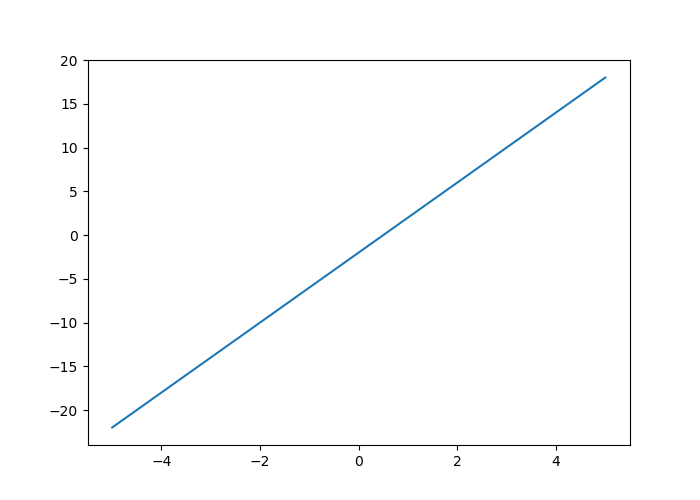

In [3]:
class Quadratic(Quadratic):
    def __add__(self, other):
        a2, a1, a0 = self.coeffs
        b2, b1, b0 = other.coeffs
        return Quadratic(a2+b2, a1+b1, a0+b0)

    
# Test block
f = Quadratic(1, -2, 1)
g = Quadratic(-1, 6, -3)
h = f + g
print(h)
plt.figure(1, figsize=(7,5))
x = np.linspace(-5, 5, 101)
plt.plot(x, h(x))
plt.show()

Note that the result becomes a straight line, and so the output when priting also starts with "0x^2". This isn't particularly good class design, and we should probably handle it in some way, but we ignore this for now. 

### Exercise 1d) Finding the roots

We do not bother with handling the edge case of $a=0$ here, altough we probably should! Note also that `return ()` returns an empty tuple.

In [4]:
class Quadratic(Quadratic):
    def roots(self):
        """Find the roots of the quadratic function (if any).
        
        The roots are the points where f(x) = 0, a quadratic function
        has 0, 1 or 2 roots. Results are returned as a tuple.
        
        Warning: Does not currently handle the edge case of a=0.
        """
        a, b, c = self.coeffs
        discriminant = b**2 - 4*a*c
        
        # No roots
        if discriminant < 0:
            return ()
        
        # One root
        elif discriminant == 0:
            return (-b/(2*a),)
    
        # Two roots
        else:
            sqrt_disc = np.sqrt(discriminant)
            return ((-b-sqrt_disc)/(2*a), (-b+sqrt_disc)/(2*a))

        
# Test block
print(f"{'f':^15} | {'roots':^10}")
for f in Quadratic(2, -2, 2), Quadratic(1, -2, 1), Quadratic(1, -3, 2):
    print(f"{str(f):>15s} | {str(f.roots()):^10s}")

       f        |   roots   
  2x^2 - 2x + 2 |     ()    
   x^2 - 2x + 1 |   (1.0,)  
   x^2 - 3x + 2 | (1.0, 2.0)


### Exercise 1e) Finding the intersection of two quadratic functions

Finding the intersections between $f$ and $g$ means solving the equation where $f = g$, which can be rewritten as $f-g = 0$, and we know that $f-g$ defines a polynomial. So we first make a `__sub__` special method so we can compute $h = f - g$, and then simply call $h.roots()$

<IPython.core.display.Javascript object>


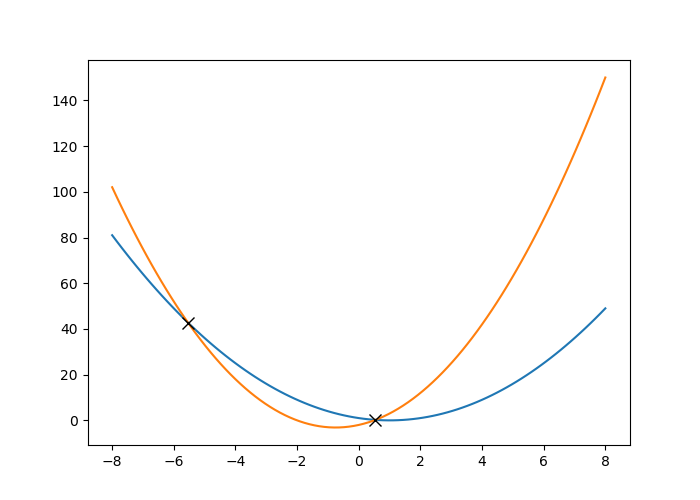

In [5]:
class Quadratic(Quadratic):
    def __sub__(self, other):
        """Subtract two Quadratic objects giving a new Quadratic object."""
        a2, a1, a0 = self.coeffs
        b2, b1, b0 = other.coeffs
        return Quadratic(a2-b2, a1-b1, a0-b0)
        
    def intersect(self, other):
        diff = self - other
        return diff.roots()

plt.figure(2, figsize=(7,5))
f = Quadratic(1, -2, 1)
g = Quadratic(2, 3, -2)

x = np.linspace(-8, 8, 101)
plt.plot(x, f(x))
plt.plot(x, g(x))

x_intersect = f.intersect(g)
y_intersect = [f(i) for i in x_intersect]
plt.plot(x_intersect, y_intersect, 'x', color='black', markersize=8)
plt.show()

## Exercise 2 - A class for general polynomials
### Exercise 2a) Defining the Polynomial class

Note that when we loop over the dictionary, we write
```Python
for n, an in self.coeffs.items()
```
This is because the `.items`-method returns a list of (key, value) tuples.

x^10 - x^5 + 1


<IPython.core.display.Javascript object>


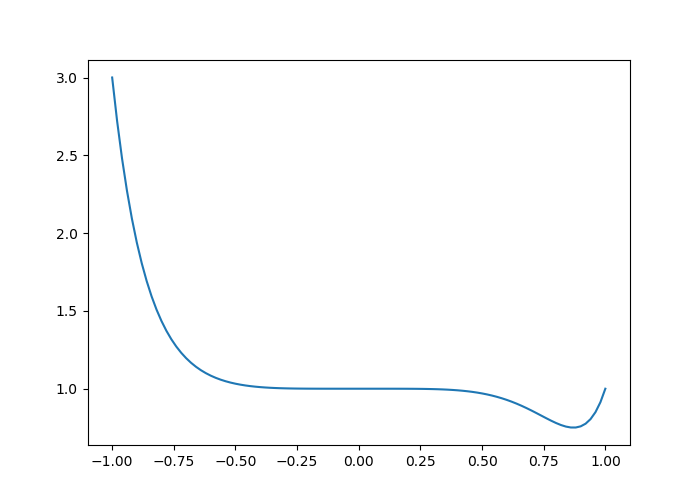

In [6]:
class Polynomial:
    def __init__(self, coeffs):
        self.coeffs = coeffs
    
    def __call__(self, x):
        tot = 0
        for n, an in self.coeffs.items():
            tot += an*x**n
        return tot
    
    def __str__(self):
        # Create list of terms
        terms = [f"{an}x^{n}" for n, an in sorted(self.coeffs.items(), reverse=True)]
        # Join together to form string
        string = " + ".join(terms)
        # Handle special cases for prettier print
        string = string.replace("+ -", "- ")
        string = string.replace("x^0", "")
        string = string.replace("x^1 ", "x ")
        string = string.replace(" 1x", " x")
        if string.startswith("1x"):
            string = string[1:]
        if string.endswith("^1"):
            string = string[:-2]
        return string

coeffs = {0: 1, 5:-1, 10:1}
f = Polynomial(coeffs)
print(f)

plt.figure(3, figsize=(7,5))
x = np.linspace(-1, 1, 101)
plt.plot(x, f(x))
plt.show()


### Exercise 2b): Adding general polynomials together

Here we give several example solutions. First with the most straight-forward approach:

In [7]:
class Polynomial(Polynomial):
    def __add__(self, other):
        new_coeffs = {}
        
        # Add all terms from first polynomial
        for n, an in self.coeffs.items():
            new_coeffs[n] = an
        
        # Add all terms from second polynomial (careful with collisions)
        for n, bn in other.coeffs.items():
            if n in new_coeffs:
                new_coeffs[n] += bn
            else:
                new_coeffs[n] = bn
        
        # Delete coefficients that cancel out, for efficiency and tidyness
        new_coeffs = {n: cn for n, cn in new_coeffs.items() if cn != 0}
        return Polynomial(new_coeffs)
    
# Test block
f = Polynomial({0:1, 5:-7, 10:1})
g = Polynomial({5:7, 10:1, 15:-3})
print(f+g)

-3x^15 + 2x^10 + 1


An alternative is to use `collections.defaultdict`, which defaults to `0` if we try to use a key that doesn't exist.

In [8]:
from collections import defaultdict

class Polynomial(Polynomial):
    def __add__(self, other):
        new_coeffs = defaultdict(int)
        
        # Add all coefficients from both polynomials
        for n, an in self.coeffs.items():
            new_coeffs[n] += an
        for n, bn in other.coeffs.items():
            new_coeffs[n] += bn
            
        # Delete coefficients that cancel out, for efficiency and tidyness
        new_coeffs = {n: an for n, an in new_coeffs.items() if an != 0}
        return Polynomial(new_coeffs)

# Test block
f = Polynomial({0:1, 5:-7, 10:1})
g = Polynomial({5:7, 10:1, 15:-3})
                
print(f+g)

-3x^15 + 2x^10 + 1


Alternatively we could have used a normal dictionary and the `.get` method with a default-value of 0, i.e.,
```Python
for n, an in self.coeffs.items():
            new_coeffs[n] = an
        for n, bn in other.coeffs.items():
            new_coeffs[n] = new_coeffs.get(n, 0) + bn
``` 


###  Exercise 2c) Defining a `AddableDictionary` class

Note: Several people have complained about this exercise being confusing. The goal was simply to show how one could extend a built in class to add new functionality to it—and how such extensions could generalize a feature.

We only need to make the `add` method, which should make a new `AddableDictionary` object. We first make a copy of `self`, and then add in the `other` to it

In [9]:
class AddableDict(dict):
    def __add__(self, other):
        new_dict = AddableDict(self)
        for key, value in other.items():
            if key in new_dict:
                new_dict[key] += value
            else:
                new_dict[key] = value
        return new_dict
    
a = AddableDict({0: 2, 1: 3, 2: 4})
b = AddableDict({0: -1, 1:3, 2: 3, 3: 2})
print(a + b)

{0: 1, 1: 6, 2: 7, 3: 2}


With the `AddableDict` class, making the Polynomial class is easier:

```
class Polynomial:
    def __init__(self, coeffs):
        self.coeffs = AddableDict(coeffs)
        
    def __add__(self, others):
        return Polynomial(self.coeffs + other.coeffs)
```

### Exercise 2d) Derivative of a polynomial
You can solve this with a normal for-loop:

In [10]:
class Polynomial(Polynomial):
    def derivative(self):
        new_coeffs = {}
        for n, an in self.coeffs.items():
            if n != 0:
                new_coeffs[n-1] = an*n
        return Polynomial(new_coeffs)
    
f = Polynomial({10:1, 6:-3, 2:2})
df = f.derivative()
print(df)

10x^9 - 18x^5 + 4x


Or it can be done a bit quicker using a *dictionary* comprehension:

In [11]:
class Polynomial(Polynomial):
    def derivative(self):
        new_coeffs = {n-1: an*n for n, an in self.coeffs.items() if n != 0}
        return Polynomial(new_coeffs)
    
    
f = Polynomial({10:1, 6:-3, 2:2})
df = f.derivative()
print(df)

10x^9 - 18x^5 + 4x


### Exercise 2e) Multiplying polynomials

Here we need to use nested loops

In [12]:
class Polynomial(Polynomial):
    def __mul__(self, other):
        new_coeffs = {}
        for i, ai in self.coeffs.items():
            for j, bj in other.coeffs.items():
                new_coeffs[i+j] = ai*bj
        return Polynomial(new_coeffs)
        
f = Polynomial({2: 4, 1: 1})
g = Polynomial({3: 3, 0: 1})
print(f*g)

12x^5 + 3x^4 + 4x^2 + x


## Exercise 3 — Harmonic Oscillator Wave Function


### Exercise 3a) HOWF and Hermite Polynomials


In [15]:
class HOWF:
    def __init__(self, n):
        self.n = n
        self.H = self._compute_hermite(n)
        
    def _compute_hermite(self, n): 
        if n == 0:
            return Polynomial({0 : 1})
        elif n == 1:
            return Polynomial({1 : 2})
        else:
            poly1 = Polynomial({1 : 2})
            poly2 = Polynomial({0 : -2*(n-1)})
            return poly1*self._compute_hermite(n-1) + poly2*self._compute_hermite(n-2)

In [16]:
def test_Hermite():
    H0 = lambda x: 1
    H1 = lambda x: 2*x
    H2 = lambda x: 4*x*x - 2
    H3 = lambda x: 8*x**3 - 12*x
    H4 = lambda x: 16*x**4 - 48*x**2 + 12
    H5 = lambda x: 32*x**5 - 160*x**3 + 120*x
    H_table = [H0, H1, H2, H3, H4, H5]
    
    tol = 1e-12
    for n in range(0, 6):
        H = HOWF(n).H
        for x in [0, 0.5, 1.0/3, 1, 3/2, 2]:
            expected = H_table[n](x)
            computed = H(x)
            msg = "The implemented Hermite Polynomial yields unexpected result for n = %d\
            \n\tH(%.2f) = %.13g != %.13g" %(n, x, expected, computed)
            assert abs(expected - computed) < tol, msg
            
test_Hermite() 

### Exercise 3b) The quantum harmonic wave function 

The imports are included because there is a known bug in numpy.sqrt(x). It will cry if the x-value is too large.

In [17]:
from numpy import exp, pi
from math import factorial, sqrt


class HOWF(HOWF):
    def __call__(self, chi):
        A = pi**(-1/4)*2**(-self.n/2)/sqrt(factorial(self.n))
        H = self.H(chi)
        return A*H*exp(-chi**2/2.0)
    
    @property
    def energy(self):
        return 2*self.n + 1

### Exercise 3c) Visualising the wave functions

<IPython.core.display.Javascript object>


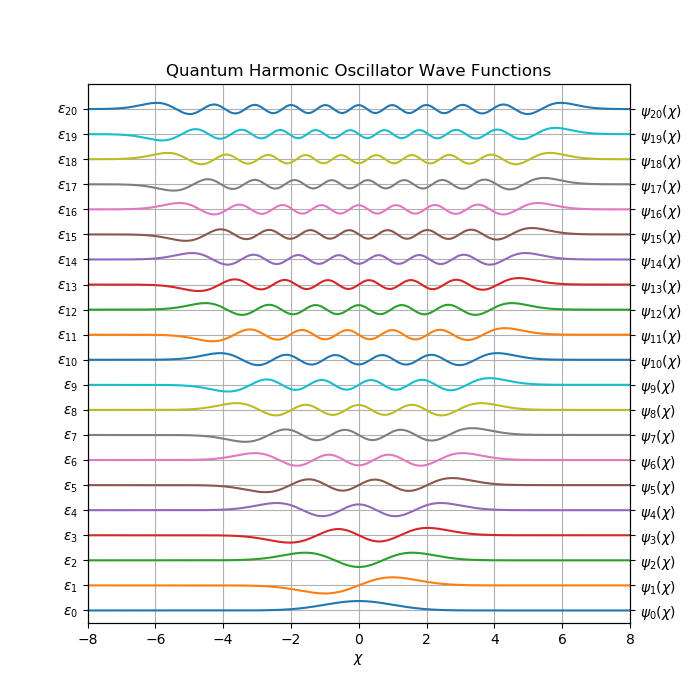

C:\Users\kristian\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


In [18]:
import matplotlib.pyplot as plt
import numpy as np

N = 20
xmax = 8

fig, ax = plt.subplots(figsize=(7, 7))
chi = np.linspace(-xmax, xmax, 300)
y = []
y_tick = []
y_tick_right = []
for n in range(0, N+1):
    psi = HOWF(n)
    plt.plot(chi, psi(chi) + psi.energy)
    y_tick.append(r"$\epsilon_{%d}$" %n)
    y.append(psi.energy)
    y_tick_right.append("$\psi_{%d} (\chi)$" %n)
    
plt.grid()
plt.ylim([0, 2*N + 3])
plt.yticks(y, y_tick)
plt.xlabel(r"$\chi$")
plt.xlim(-xmax, xmax)

# just to get the "labels" on the other side...
ax2 = ax.twinx() 
plt.ylim([0, 2*N + 3])
plt.yticks(y, y_tick_right)
plt.tick_params(axis='y', labelleft='off', labelright='on')

plt.title("Quantum Harmonic Oscillator Wave Functions")
plt.show()

## Exercise 4 — Fibonnaci with Memoization

### Exercise 4a) A Fibonacci function

Here we use an if-test to check for the base-case ($n=0$ or $n=1$), and call the function recursively if $n>1$:

In [17]:
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

To print out we can use a for-loop. Here we instead use the `str.join`-method and a list comprehension just to show off:

In [18]:
print(", ".join([str(fibonacci(i)) for i in range(1, 11)]))

1, 1, 2, 3, 5, 8, 13, 21, 34, 55


### Exercise 4b) Improving our algorithm


In [19]:
class Fibonacci:
    def __init__(self):
        self.memory = {0: 1, 1: 1}
        
    def __call__(self, n):
        if n in self.memory:
            return self.memory[n]
        else:
            fn = self(n-1) + self(n-2)
            self.memory[n] = fn
            return fn

In [20]:
fib = Fibonacci()
print(", ".join([str(fib(i)) for i in range(1, 11)]))
fib(100)

1, 2, 3, 5, 8, 13, 21, 34, 55, 89


573147844013817084101

### Exercise 4c) Maximum Recursion Depth

Calling `F(100000)` gives us the error
```
RecursionError: maximum recursion depth exceeded while calling a Python object
```
This is because there are two many function calls that are yet to return simultaneously, this is called the "recursion depth", and Python has a built in max here. Often because so many simultanous calls are usually due to some bug. 

One can theoretically increase the max recursion depth limit in Python, but this is the wrong way to handle our problem. Instead, we should build up our memoization dictionary from the bottom up, rather the top down. We can either do this outside the class, like this:

In [21]:
fib = Fibonacci()

# Build up memoization dictionary
for i in range(2, 100000, 2):
    fib(i)
    
print(len(str(fib(100000))))

20899


Here we first create a `Fibonacci`-object, and then we "train" it on continiously higher numbers. Finally we use it to find the number we actually want. 

Note that instead of printing out $F_{100000}$, we print out the number of digits in the number. We could now for example go back and add an optional key-word argument to the `Fibonacci`-constructor, that builds up the memoization dictionary and makes it "ready for use".

We could build this "training" into the constructor of the class as an optional argument, so that if we know we want large Fibonacci-numbers, we specify it when we create our object.

In [22]:
class Fibonacci:
    def __init__(self, n=0):
        self.memory = {0: 1, 1: 1}
        
        if n:
            for i in range(2, n, 2):
                self(i)
        
    def __call__(self, n):
        if n in self.memory:
            return self.memory[n]
        else:
            fn = self(n-1) + self(n-2)
            self.memory[n] = fn
            return fn
        


In [23]:
N = 100000
fib = Fibonacci(N)
print(len(str(fib(N))))

20899


### Exercise 4d) A memoized factorial class

In [24]:
class Factorial:
    def __init__(self):
        self.memory = {0: 1}
    
    def __call__(self, n):
        if n in self.memory:
            return self.memory[n]
        else:
            fn = n*self(n-1)
            self.memory[n] = fn
            return fn

As a test, we can write out 52!, the number of possible arrangemenets of a deck of cards:

In [25]:
factorial = Factorial()
print(factorial(52))
print(f"{factorial(52):.1e}")

80658175170943878571660636856403766975289505440883277824000000000000
8.1e+67


Note that when we call `factorial(52)` twice, we aren't actually repeating our calculation twice, as the function stores the result for us thanks to memoization. However, the user doesn't have to think about this, or even know about it. This is another example of *encapsulation*.